# Tables With Graph Objects

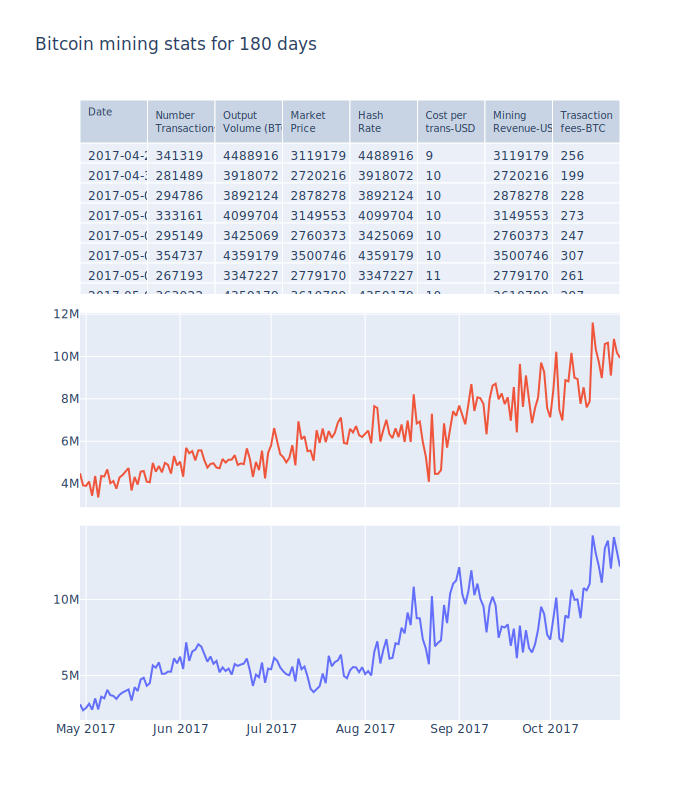

In [2]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import pandas as pd
import re

df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/Mining-BTC-180.csv")

for i, row in enumerate(df["Date"]):
    p = re.compile(" 00:00:00")
    datetime = p.split(df["Date"][i])[0]
    df.iloc[i, 1] = datetime

fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    specs=[[{"type": "table"}],
           [{"type": "scatter"}],
           [{"type": "scatter"}]]
)

fig.add_trace(
    go.Scatter(
        x=df["Date"],
        y=df["Mining-revenue-USD"],
        mode="lines",
        name="mining revenue"
    ),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(
        x=df["Date"],
        y=df["Hash-rate"],
        mode="lines",
        name="hash-rate-TH/s"
    ),
    row=2, col=1
)

fig.add_trace(
    go.Table(
        header=dict(
            values=["Date", "Number<br>Transactions", "Output<br>Volume (BTC)",
                    "Market<br>Price", "Hash<br>Rate", "Cost per<br>trans-USD",
                    "Mining<br>Revenue-USD", "Trasaction<br>fees-BTC"],
            font=dict(size=10),
            align="left"
        ),
        cells=dict(
            values=[df[k].tolist() for k in df.columns[1:]],
            align = "left")
    ),
    row=1, col=1
)
fig.update_layout(
    height=800,
    showlegend=False,
    title_text="Bitcoin mining stats for 180 days",
)

fig.show()